# Test Classification
----
In this notebook we do a bit of testing on classification based on only a single feature: the Mel-frequency Cepstral Coefficients (MFCCs)

In [1]:
import pandas as pd
import numpy as np
from audio_feature_extraction import BatchExtractor, FeatureVisualizer
import seaborn as sns
import warnings

In [2]:
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

In [3]:
bird_index = pd.read_csv('bird_index_clean.csv', index_col=0)

In [4]:
bird_index

,english_cname,file_name,genus,species,label
name,,,,,
XC17804,Abert's Towhee,XC17804.mp3,Melozone,aberti,Melozone aberti
XC177367,Abert's Towhee,XC177367.mp3,Melozone,aberti,Melozone aberti
XC145505,Abert's Towhee,XC145505.mp3,Melozone,aberti,Melozone aberti
XC228159,Abert's Towhee,XC228159.mp3,Melozone,aberti,Melozone aberti
XC51313,Abert's Towhee,XC51313.mp3,Melozone,aberti,Melozone aberti
...,...,...,...,...,...
XC278880,Yellow-breasted Chat,XC278880.mp3,Icteria,virens,Icteria virens
XC247723,Yellow-breasted Chat,XC247723.mp3,Icteria,virens,Icteria virens
XC408122,Yellow-breasted Chat,XC408122.mp3,Icteria,virens,Icteria virens


In [5]:
rand_labels = np.random.choice(bird_index.label.unique(), 10, replace=False)

In [6]:
rand_labels

array(['Catherpes mexicanus', 'Myiarchus cinerascens', 'Colaptes auratus',
       'Empidonax wrightii', 'Oreortyx pictus', 'Psaltriparus minimus',
       'Pheucticus melanocephalus', 'Spinus psaltria',
       'Leuconotopicus albolarvatus', 'Nucifraga columbiana'],
      dtype=object)

In [7]:
bird_index_class_sample = bird_index.loc[bird_index.label.isin(rand_labels)]

In [8]:
bird_index_class_sample

,english_cname,file_name,genus,species,label
name,,,,,
XC297437,American Bushtit,XC297437.mp3,Psaltriparus,minimus,Psaltriparus minimus
XC149395,American Bushtit,XC149395.mp3,Psaltriparus,minimus,Psaltriparus minimus
XC149392,American Bushtit,XC149392.mp3,Psaltriparus,minimus,Psaltriparus minimus
XC149402,American Bushtit,XC149402.mp3,Psaltriparus,minimus,Psaltriparus minimus
XC306327,American Bushtit,XC306327.mp3,Psaltriparus,minimus,Psaltriparus minimus
...,...,...,...,...,...
XC192881,White-headed Woodpecker,XC192881.mp3,Leuconotopicus,albolarvatus,Leuconotopicus albolarvatus
XC378272,White-headed Woodpecker,XC378272.mp3,Leuconotopicus,albolarvatus,Leuconotopicus albolarvatus
XC408775,White-headed Woodpecker,XC408775.mp3,Leuconotopicus,albolarvatus,Leuconotopicus albolarvatus


In [9]:
bird_index_class_sample.label.value_counts()

Catherpes mexicanus            30
Pheucticus melanocephalus      30
Oreortyx pictus                30
Colaptes auratus               30
Empidonax wrightii             30
Leuconotopicus albolarvatus    30
Nucifraga columbiana           30
Psaltriparus minimus           30
Myiarchus cinerascens          30
Spinus psaltria                30
Name: label, dtype: int64

In [10]:
bird_index.label.value_counts().sort_values()

Polioptila californica    30
Contopus sordidulus       30
Dryobates nuttallii       30
Geothlypis trichas        30
Vireo gilvus              30
                          ..
Troglodytes aedon         30
Polioptila melanura       30
Empidonax oberholseri     30
Cyanocitta stelleri       30
Troglodytes pacificus     30
Name: label, Length: 91, dtype: int64

In [11]:
be = BatchExtractor(frame_length=2048, audio_index=bird_index_class_sample)

In [12]:
samp_feats_flat = be.merge_and_flatten_features(
    ['mfcc', 'zcr', 'centroid', 'bandwidth', 'rms', 'contrast', 'flatness', 'rolloff', 'tonnetz', 'ccqt', 'cstft', 'ccens'],
    label=True)

In [13]:
samp_feats_flat

,mfcc_0_0,mfcc_0_1,mfcc_0_2,mfcc_0_3,mfcc_0_4,mfcc_0_5,mfcc_0_6,mfcc_0_7,mfcc_0_8,mfcc_0_9,...,ccens_11_6097,ccens_11_6098,ccens_11_6099,ccens_11_6100,ccens_11_6101,ccens_11_6102,ccens_11_6103,ccens_11_6104,ccens_11_6105,label
XC297437,-607.28530,-529.93510,-514.30286,-539.36280,-560.63654,-568.86090,-547.70390,-515.23040,-448.43597,-446.39008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psaltriparus minimus
XC149395,-846.38074,-846.38074,-846.38074,-846.38074,-843.08560,-833.39484,-824.72420,-812.73450,-800.88470,-790.61460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psaltriparus minimus
XC149392,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-775.21640,-765.80510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psaltriparus minimus
XC149402,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psaltriparus minimus
XC306327,-393.70218,-388.90546,-390.32043,-390.25302,-392.91364,-395.67596,-391.37497,-390.05664,-388.49655,-387.55515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Psaltriparus minimus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XC192881,-187.38200,-194.00514,-203.40890,-206.12488,-205.29959,-202.74712,-198.33534,-198.81146,-203.02628,-201.62569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Leuconotopicus albolarvatus
XC378272,-310.97812,-275.29852,-263.08690,-258.75473,-260.95798,-261.83575,-265.10767,-269.80313,-271.54360,-264.23760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Leuconotopicus albolarvatus
XC408775,-393.10477,-343.67120,-326.50638,-320.26240,-325.63210,-328.49298,-324.12787,-325.52222,-325.95166,-322.01642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Leuconotopicus albolarvatus
XC192578,-487.80582,-467.78040,-456.53200,-456.65890,-455.00780,-459.69632,-445.80377,-434.85263,-452.49155,-449.32062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Leuconotopicus albolarvatus


In [103]:
samp_feats_flat.to_csv('test.csv')

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [16]:
ss = StandardScaler()
le = LabelEncoder()

In [17]:
X = samp_feats_flat.iloc[:,:-1]
y = samp_feats_flat.label

In [18]:
X

,mfcc_0_0,mfcc_0_1,mfcc_0_2,mfcc_0_3,mfcc_0_4,mfcc_0_5,mfcc_0_6,mfcc_0_7,mfcc_0_8,mfcc_0_9,...,ccens_11_6096,ccens_11_6097,ccens_11_6098,ccens_11_6099,ccens_11_6100,ccens_11_6101,ccens_11_6102,ccens_11_6103,ccens_11_6104,ccens_11_6105
XC297437,-607.28530,-529.93510,-514.30286,-539.36280,-560.63654,-568.86090,-547.70390,-515.23040,-448.43597,-446.39008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC149395,-846.38074,-846.38074,-846.38074,-846.38074,-843.08560,-833.39484,-824.72420,-812.73450,-800.88470,-790.61460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC149392,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-776.88290,-775.21640,-765.80510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC149402,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,-770.24896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC306327,-393.70218,-388.90546,-390.32043,-390.25302,-392.91364,-395.67596,-391.37497,-390.05664,-388.49655,-387.55515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XC192881,-187.38200,-194.00514,-203.40890,-206.12488,-205.29959,-202.74712,-198.33534,-198.81146,-203.02628,-201.62569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC378272,-310.97812,-275.29852,-263.08690,-258.75473,-260.95798,-261.83575,-265.10767,-269.80313,-271.54360,-264.23760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC408775,-393.10477,-343.67120,-326.50638,-320.26240,-325.63210,-328.49298,-324.12787,-325.52222,-325.95166,-322.01642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC192578,-487.80582,-467.78040,-456.53200,-456.65890,-455.00780,-459.69632,-445.80377,-434.85263,-452.49155,-449.32062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y_encoded = le.fit_transform(y)
y_encoded

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [48]:
x_train, x_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.1)

In [49]:
x_train_std = ss.fit_transform(x_train)
x_val_std = ss.transform(x_val)

In [50]:
x_train_std.shape

(270, 457950)

In [51]:
pca = PCA(n_components=100)

In [52]:
x_train_pca = pca.fit_transform(x_train_std)
x_val_pca = pca.transform(x_val_std)

In [53]:
knn = KNeighborsClassifier(n_neighbors=30)

In [54]:
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [55]:
knn.score(x_train_pca, y_train)

0.21481481481481482

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gnb = GaussianNB()

In [58]:
gnb.fit(x_train_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
gnb.score(x_train_pca, y_train)

0.4444444444444444

In [60]:
gnb.score(x_val_pca, y_val)

0.26666666666666666

In [61]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
gnb.score(x_train, y_train)

0.24444444444444444

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=2)

In [65]:
rfc.fit(x_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
rfc.score(x_train_pca, y_train)

0.5666666666666667

In [67]:
rfc.score(x_val_pca, y_val)

0.1

In [68]:
rfc = RandomForestClassifier()

In [69]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(2, 22, 2),
             'n_estimators': np.arange(10, 110, 10)}

In [71]:
rfs_gs = GridSearchCV(rfc, param_grid, cv=3, scoring='precision_micro')

In [72]:
rfs_gs.fit(x_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [73]:
rfs_gs.best_score_

0.2851851851851852

In [74]:
rfs_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbc = GradientBoostingClassifier()

In [77]:
gbc.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [81]:
param_grid = {'learning_rate': 10**np.arange(-3.0, 4.0, 1.0),
             'max_depth': np.arange(2, 22, 2),
             'n_estimators': np.arange(100, 1000, 100)}

In [82]:
gbc_gs = GridSearchCV(gbc, param_grid, n_jobs=-1, scoring='f1_macro', cv=3)

In [83]:
gbc_gs.fit(x_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  validation_fractio

In [84]:
gbc_gs.best_score_

0.19835554408483022

In [86]:
gbc_best = gbc_gs.best_estimator_

In [87]:
gbc_best.score(x_train_pca, y_train)

1.0

In [88]:
gbc_best.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [90]:
pca.explained_variance_ratio_

array([0.38875311, 0.12919876, 0.0784629 , 0.04482462, 0.03734646,
       0.02516539, 0.02160586, 0.01620496, 0.0149354 , 0.01245885,
       0.01139058, 0.01064544, 0.00900656, 0.00756446, 0.00686735,
       0.00610932, 0.00536389, 0.00523586, 0.00478699, 0.00464996,
       0.00424565, 0.003725  , 0.00353396, 0.00340401, 0.0033581 ,
       0.00327871, 0.00310748, 0.00304821, 0.0028048 , 0.00268843,
       0.00259532, 0.00248125, 0.00237747, 0.00230681, 0.00218606,
       0.00215324, 0.00203418, 0.00194829, 0.00190713, 0.00181181,
       0.0017767 , 0.00171049, 0.00169206, 0.00161792, 0.00159995,
       0.00144714, 0.00140914, 0.00139069, 0.00134359, 0.00133465,
       0.00128817, 0.00125408, 0.00121231, 0.00119298, 0.0011704 ,
       0.00114805, 0.00112274, 0.00110825, 0.00107651, 0.00106398,
       0.00105306, 0.00102846, 0.00101039, 0.00099301, 0.00098474,
       0.00097364, 0.00094962, 0.00092954, 0.00090649, 0.00090138,
       0.00089747, 0.00087582, 0.00086462, 0.00084436, 0.00083

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

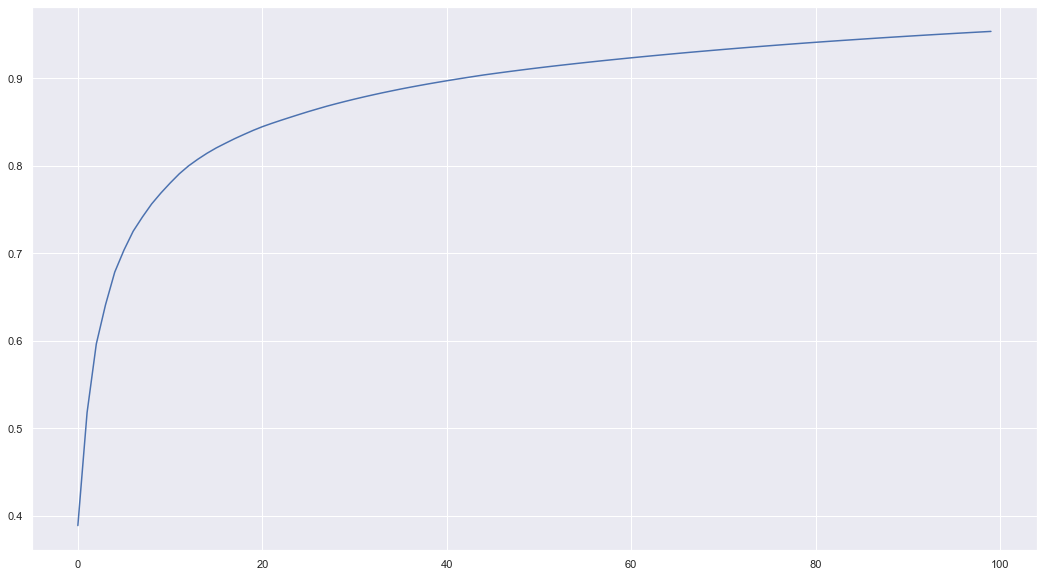

In [102]:
pca_fig, pca_ax = plt.subplots(figsize=(18,10))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_), ax=pca_ax)